In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the data is in a CSV file named "stock_data.csv"
data = pd.read_csv("/content/AAPL_daily_processed_data (8).csv")
data

import pandas as pd
import numpy as np

# Sample data with three features: 'feature1', 'feature2', 'feature3'
data = {
    'feature1': [1, 2, 3, 4, 5],
    'feature2': [2, 4, 6, 8, 10],
    'feature3': [3, 6, 9, 12, 15]
}

df = pd.DataFrame(data)

# Compute the correlation matrix
correlation_matrix = df.corr()

# Set a threshold for determining multicollinearity
threshold = 0.8

# Check for multicollinearity among the three features
multicollinear = False
for i in range(len(correlation_matrix)):
    for j in range(i+1, len(correlation_matrix)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            multicollinear = True
            print(f"Features '{correlation_matrix.columns[i]}' and '{correlation_matrix.columns[j]}' are multicollinear with correlation coefficient: {correlation_matrix.iloc[i, j]}")

if not multicollinear:
    print("No multicollinearity detected among the three features.")


,Open,High,Low,Close,Volume,Dividends,Stock Splits,SentimentScoreSP500,SentimentScoreStockMarket,SentimentScoreTicker,...,cmf,ma_10,ma_30,ma_50,ma_200,macd_signal,macd_hist,PbRatio,PeRatio,PsRatio
0,72.444299,73.510523,72.187528,73.449387,135480400,0.0,0.0,0.07320,-0.09117,0.00000,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.73024,27.897785,6.698391
1,72.666848,73.505640,72.507895,72.735321,146322800,0.0,0.0,0.02732,-0.12204,0.00000,...,NaN,NaN,NaN,NaN,NaN,-0.011392,-0.045570,45.73024,27.897785,6.698391
2,71.845179,73.354024,71.590849,73.314896,118387200,0.0,0.0,0.07320,0.20396,-0.01531,...,NaN,NaN,NaN,NaN,NaN,-0.020056,-0.034653,45.73024,27.897785,6.698391
3,73.324665,73.583883,72.747540,72.970078,108872000,0.0,0.0,0.02732,-0.12081,-0.09246,...,NaN,NaN,NaN,NaN,NaN,-0.032010,-0.047816,45.73024,27.897785,6.698391
4,72.669293,74.449588,72.669293,74.143906,132079200,0.0,0.0,0.07320,0.02960,0.06282,...,NaN,NaN,NaN,NaN,NaN,-0.026599,0.021643,45.73024,27.897785,6.698391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,130.393229,130.659609,129.031673,129.209274,88223700,0.0,0.0,-0.17407,-0.39902,0.17879,...,0.126659,125.257817,120.461144,117.856905,97.245504,2.487662,0.639409,45.73024,27.897785,6.698391
248,129.564460,131.675851,129.347400,130.205765,54930100,0.0,0.0,-0.19124,-0.23177,0.25605,...,0.117849,126.119145,120.871582,118.073741,97.592295,2.648677,0.644061,45.73024,27.897785,6.698391
249,132.198754,135.503960,131.725160,134.862656,124486200,0.0,0.0,-0.23868,-0.03429,0.23184,...,0.160401,127.528053,121.446459,118.393170,97.925919,2.870242,0.886259,45.73024,27.897785,6.698391
250,136.204482,136.934580,132.544073,133.066986,121047300,0.0,0.0,-0.04438,-0.10183,0.00201,...,0.114559,128.819551,121.959836,118.709977,98.294394,3.082952,0.850842,45.73024,27.897785,6.698391


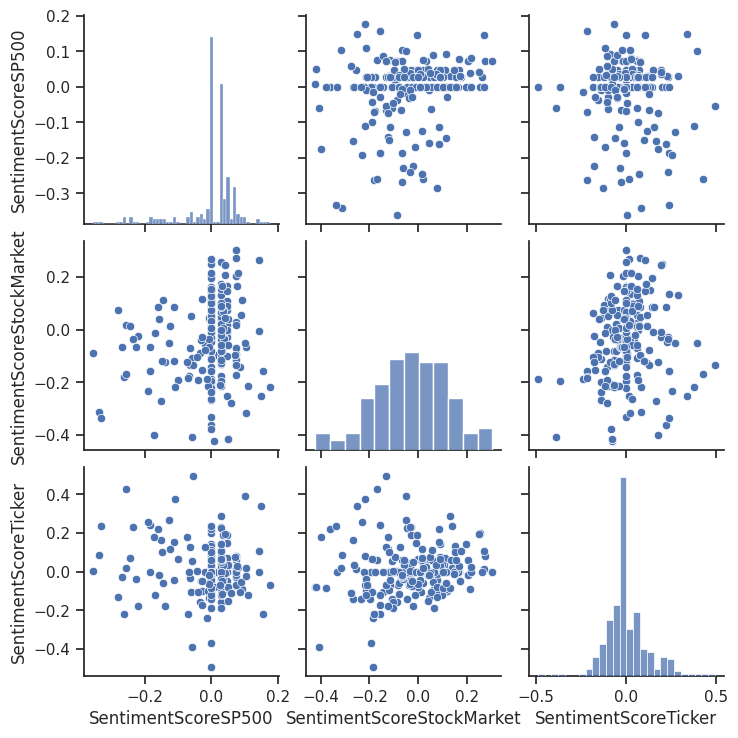

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



# Extract the three sentiment features
sentiment_features = data[['SentimentScoreSP500', 'SentimentScoreStockMarket', 'SentimentScoreTicker']]

# Create a scatterplot matrix visualization
sns.set(style="ticks", color_codes=True)
sns.pairplot(sentiment_features)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor



# Extract the three sentiment features
sentiment_features = data[['SentimentScoreSP500', 'SentimentScoreStockMarket', 'SentimentScoreTicker']]

# Add a constant term to the features for the VIF calculation
sentiment_features = np.column_stack((np.ones(len(sentiment_features)), sentiment_features))

# Calculate VIF for each feature
vif = [variance_inflation_factor(sentiment_features, i) for i in range(sentiment_features.shape[1])]

# Set a threshold for determining multicollinearity
threshold = 10

# Check for multicollinearity among the three sentiment features
multicollinear = False
for i, vif_value in enumerate(vif[1:], start=1):
    if vif_value > threshold:
        multicollinear = True
        print(f"Feature '{data.columns[i]}' has a VIF value of {vif_value}, indicating multicollinearity.")

if not multicollinear:
    print("No multicollinearity detected among the three sentiment features.")
vif


No multicollinearity detected among the three sentiment features.


[1.0438005264404997,
 1.0635395255121696,
 1.0637943004912727,
 1.0509881140016741]

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor



# Extract the three sentiment features
sentiment_features = data[['SentimentScoreSP500', 'SentimentScoreStockMarket', 'SentimentScoreTicker']]

# Add a constant term to the features for the VIF calculation
sentiment_features_with_constant = np.column_stack((np.ones(len(sentiment_features)), sentiment_features))

# Calculate VIF for each feature, excluding the constant term
vif = [variance_inflation_factor(sentiment_features_with_constant, i) for i in range(1, sentiment_features_with_constant.shape[1])]

# Set a threshold for determining multicollinearity
threshold = 10

# Print the VIF values for each sentiment feature
for feature, vif_value in zip(sentiment_features.columns, vif):
    print(f"VIF for {feature}: {vif_value}")

# Check for multicollinearity among the three sentiment features
multicollinear = False
for feature, vif_value in zip(sentiment_features.columns, vif):
    if vif_value > threshold:
        multicollinear = True
        print(f"Feature '{feature}' has a VIF value of {vif_value}, indicating multicollinearity.")

if not multicollinear:
    print("No multicollinearity detected among the three sentiment features.")


VIF for SentimentScoreSP500: 1.0635395255121696
VIF for SentimentScoreStockMarket: 1.0637943004912727
VIF for SentimentScoreTicker: 1.0509881140016741
No multicollinearity detected among the three sentiment features.


<ipython-input-2-8953517d3e93>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


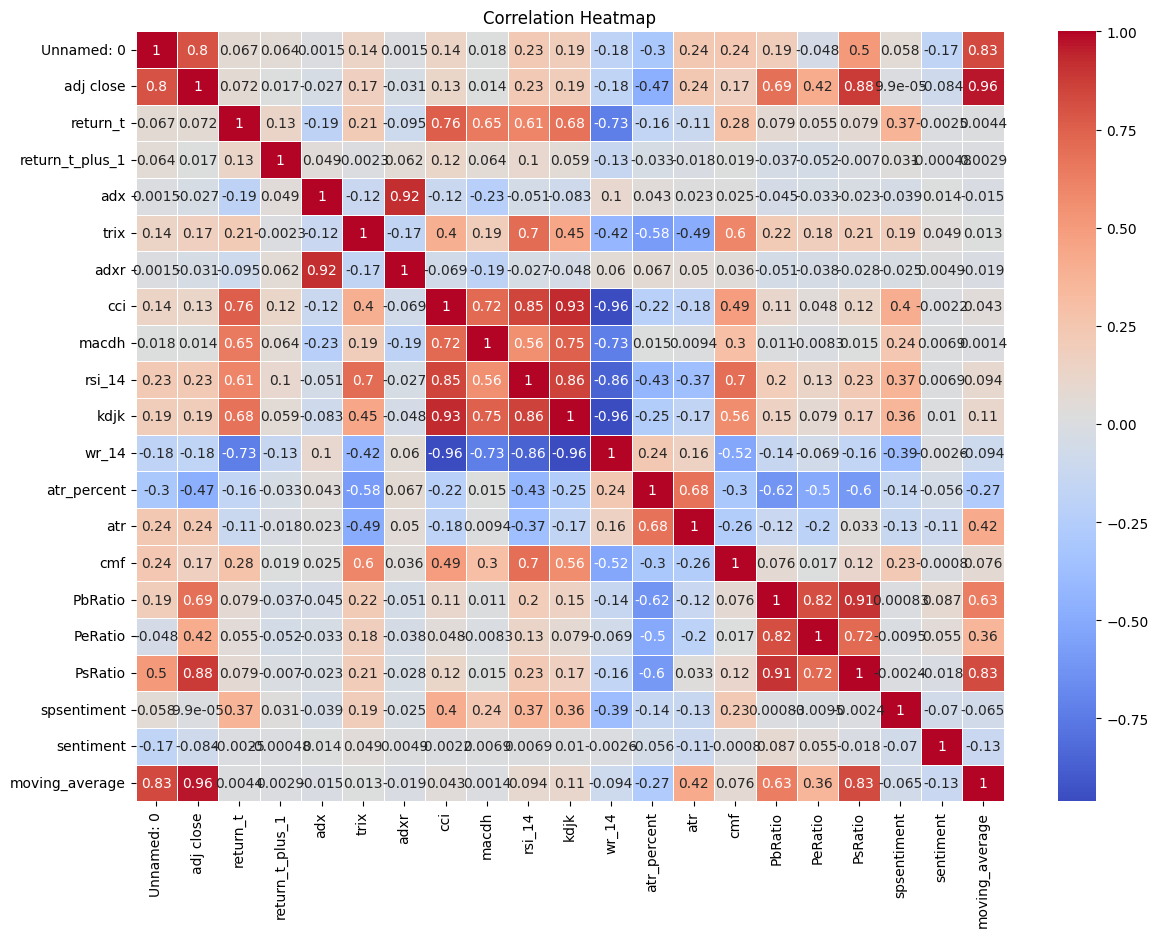

In [ ]:
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


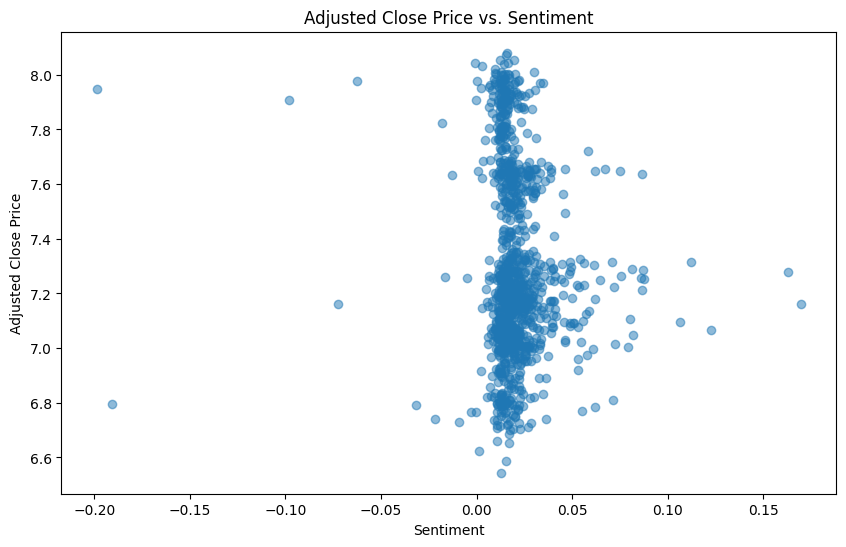

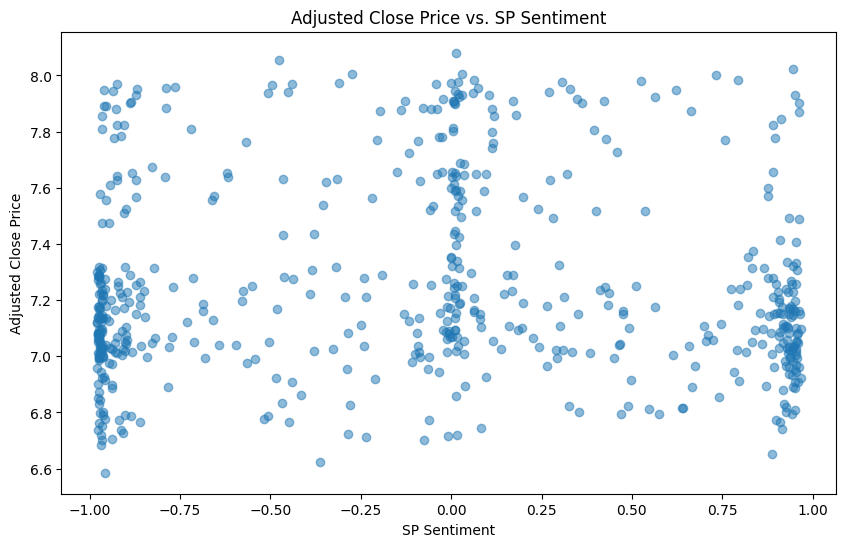

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data['sentiment'], data['adj close'], alpha=0.5)
plt.xlabel("Sentiment")
plt.ylabel("Adjusted Close Price")
plt.title("Adjusted Close Price vs. Sentiment")
plt.show()

# Do the same for 'spsentiment'
plt.figure(figsize=(10, 6))
plt.scatter(data['spsentiment'], data['adj close'], alpha=0.5)
plt.xlabel("SP Sentiment")
plt.ylabel("Adjusted Close Price")
plt.title("Adjusted Close Price vs. SP Sentiment")
plt.show()


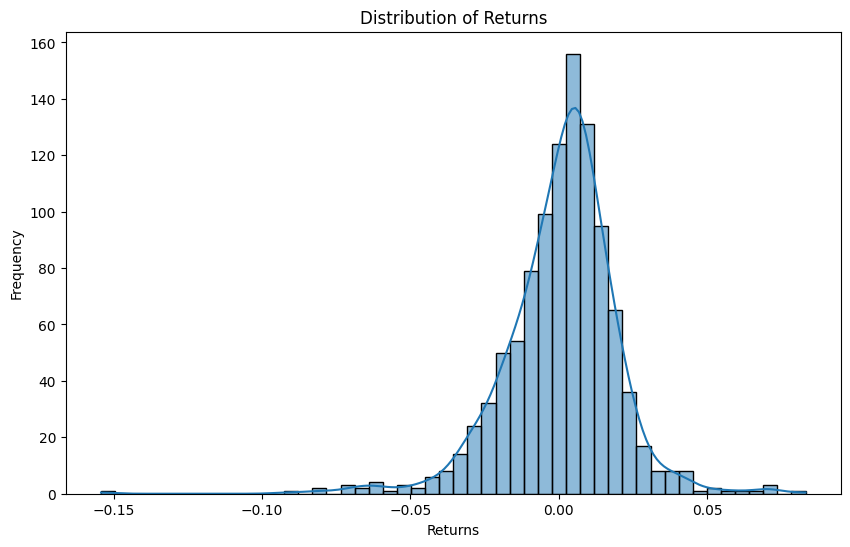

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['return_t'], bins=50, kde=True)
plt.xlabel("Returns")
plt.ylabel("Frequency")
plt.title("Distribution of Returns")
plt.show()


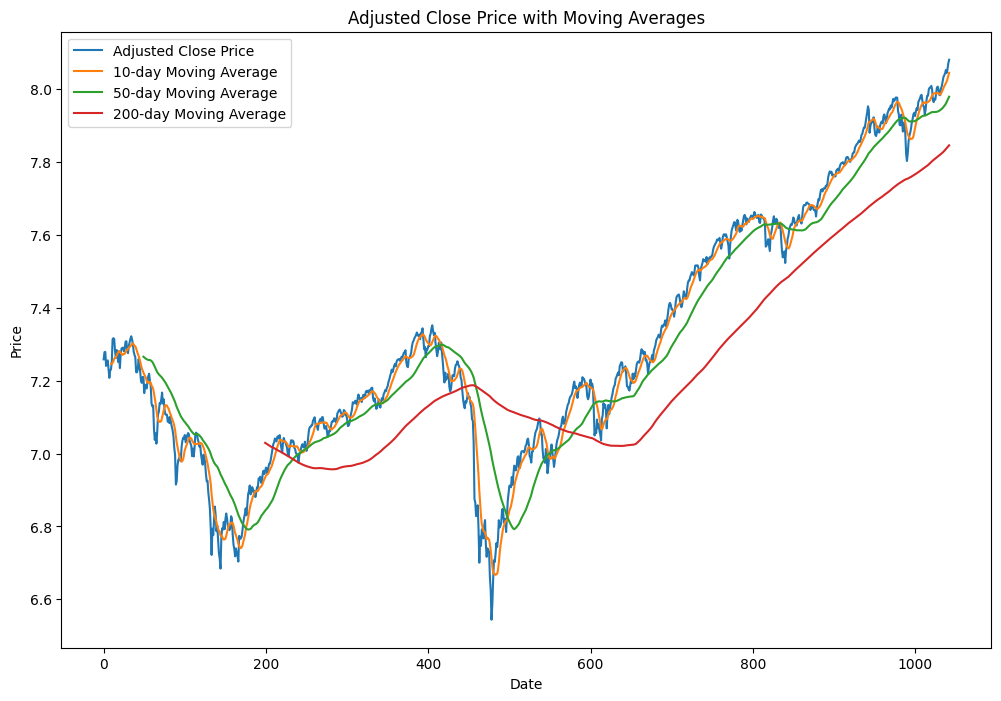

In [ ]:
# Calculate moving averages
data['MA10'] = data['adj close'].rolling(window=10).mean()
data['MA50'] = data['adj close'].rolling(window=50).mean()
data['MA200'] = data['adj close'].rolling(window=200).mean()

plt.figure(figsize=(12, 8))
plt.plot(data.index, data['adj close'], label="Adjusted Close Price")
plt.plot(data.index, data['MA10'], label="10-day Moving Average")
plt.plot(data.index, data['MA50'], label="50-day Moving Average")
plt.plot(data.index, data['MA200'], label="200-day Moving Average")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Adjusted Close Price with Moving Averages")
plt.legend()
plt.show()


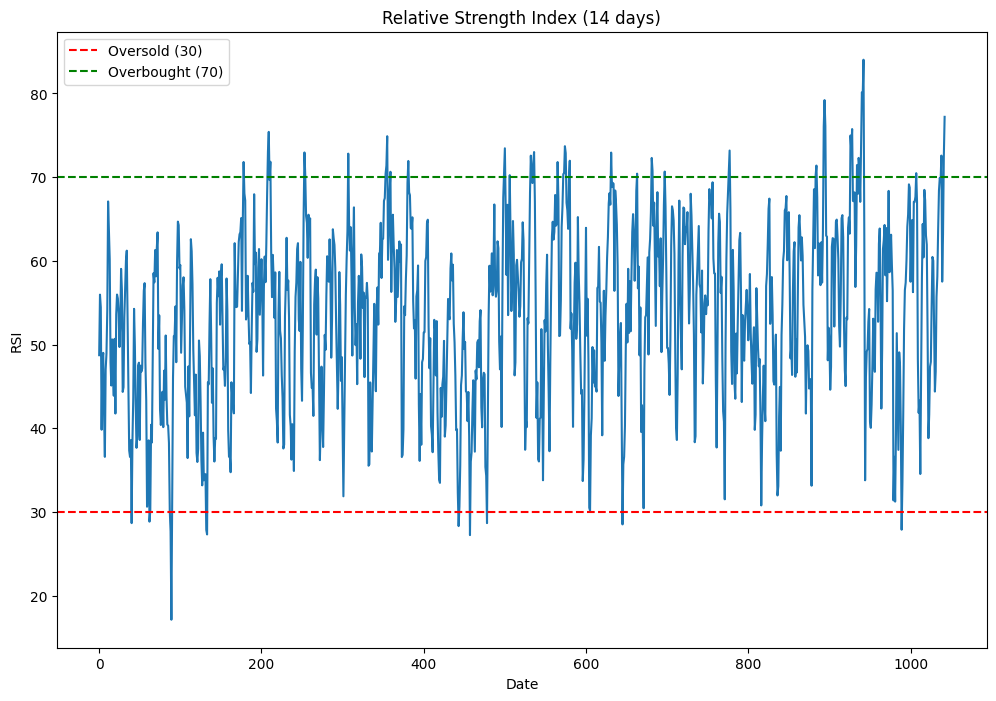

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(data.index, data['rsi_14'])
plt.axhline(30, color='r', linestyle='--', label="Oversold (30)")
plt.axhline(70, color='g', linestyle='--', label="Overbought (70)")
plt.xlabel("Date")
plt.ylabel("RSI")
plt.title("Relative Strength Index (14 days)")
plt.legend()
plt.show()


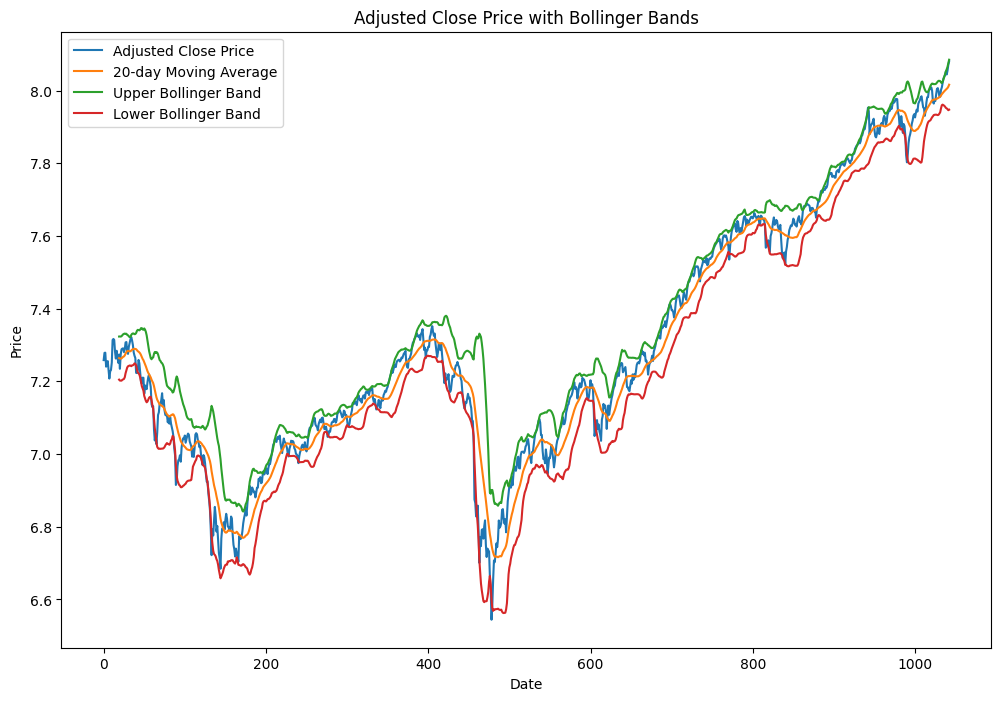

In [ ]:
# Calculate Bollinger Bands
data['MA20'] = data['adj close'].rolling(window=20).mean()
data['std20'] = data['adj close'].rolling(window=20).std()
data['Upper'] = data['MA20'] + (2 * data['std20'])
data['Lower'] = data['MA20'] - (2 * data['std20'])

plt.figure(figsize=(12, 8))
plt.plot(data.index, data['adj close'], label="Adjusted Close Price")
plt.plot(data.index, data['MA20'], label="20-day Moving Average")
plt.plot(data.index, data['Upper'], label="Upper Bollinger Band")
plt.plot(data.index, data['Lower'], label="Lower Bollinger Band")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Adjusted Close Price with Bollinger Bands")
plt.legend()
plt.show()


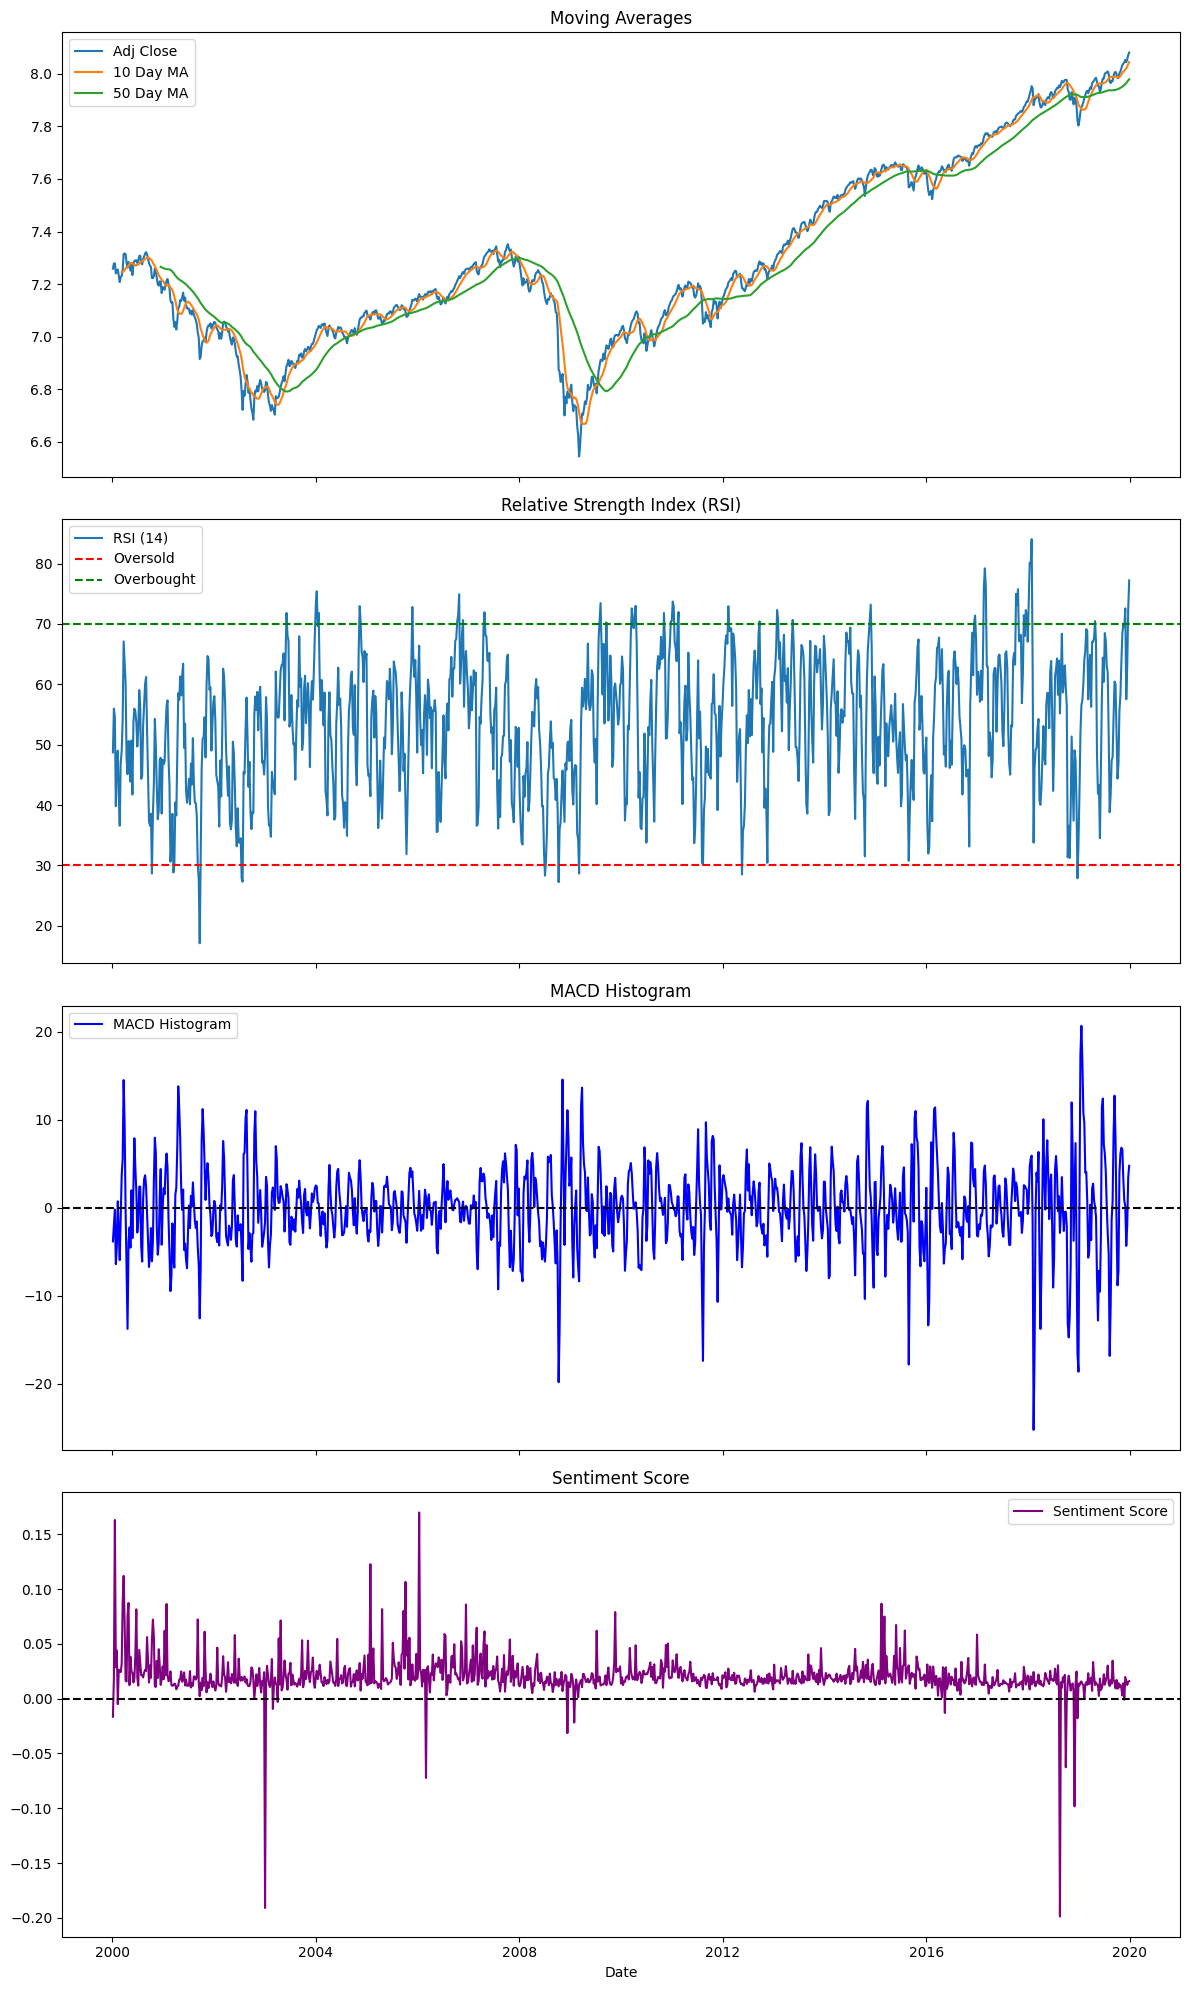

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is the DataFrame with your data
# data = pd.read_csv('your_data.csv')
data['date'] = pd.to_datetime(data['date'])

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 20), sharex=True)

# Moving Averages (using adj close for demonstration)
data['10_day_ma'] = data['adj close'].rolling(window=10).mean()
data['50_day_ma'] = data['adj close'].rolling(window=50).mean()

ax1.plot(data['date'], data['adj close'], label='Adj Close')
ax1.plot(data['date'], data['10_day_ma'], label='10 Day MA')
ax1.plot(data['date'], data['50_day_ma'], label='50 Day MA')
ax1.set_title('Moving Averages')
ax1.legend()

# RSI (using provided RSI)
ax2.plot(data['date'], data['rsi_14'], label='RSI (14)')
ax2.axhline(30, color='red', linestyle='--', label='Oversold')
ax2.axhline(70, color='green', linestyle='--', label='Overbought')
ax2.set_title('Relative Strength Index (RSI)')
ax2.legend()

# MACD (using provided MACDH)
ax3.plot(data['date'], data['macdh'], label='MACD Histogram', color='blue')
ax3.axhline(0, color='black', linestyle='--')
ax3.set_title('MACD Histogram')
ax3.legend()

# Sentiment Score (using provided sentiment)
ax4.plot(data['date'], data['sentiment'], label='Sentiment Score', color='purple')
ax4.axhline(0, color='black', linestyle='--')
ax4.set_title('Sentiment Score')
ax4.legend()

plt.xlabel('Date')
plt.tight_layout()
plt.show()


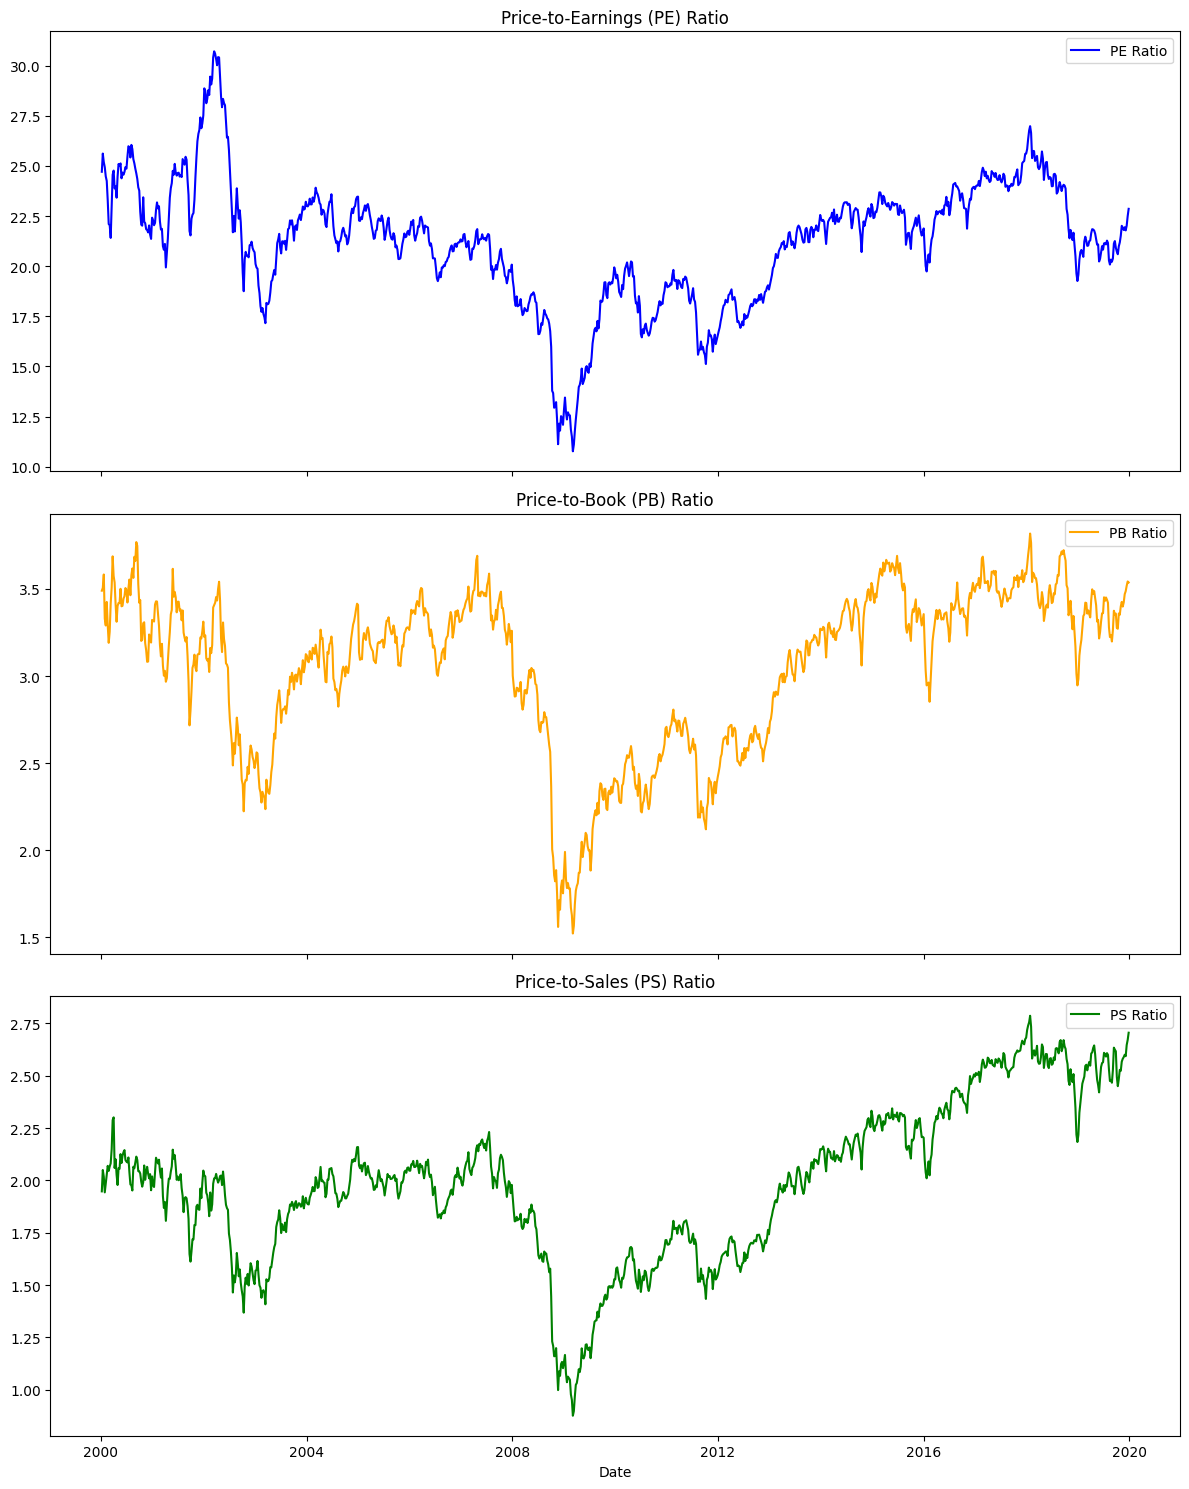

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is the DataFrame with your data
# data = pd.read_csv('your_data.csv')
data['date'] = pd.to_datetime(data['date'])

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15), sharex=True)

# Price-to-Earnings (PE) Ratio
ax1.plot(data['date'], data['PeRatio'], label='PE Ratio', color='blue')
ax1.set_title('Price-to-Earnings (PE) Ratio')
ax1.legend()

# Price-to-Book (PB) Ratio
ax2.plot(data['date'], data['PbRatio'], label='PB Ratio', color='orange')
ax2.set_title('Price-to-Book (PB) Ratio')
ax2.legend()

# Price-to-Sales (PS) Ratio
ax3.plot(data['date'], data['PsRatio'], label='PS Ratio', color='green')
ax3.set_title('Price-to-Sales (PS) Ratio')
ax3.legend()

plt.xlabel('Date')
plt.tight_layout()
plt.show()


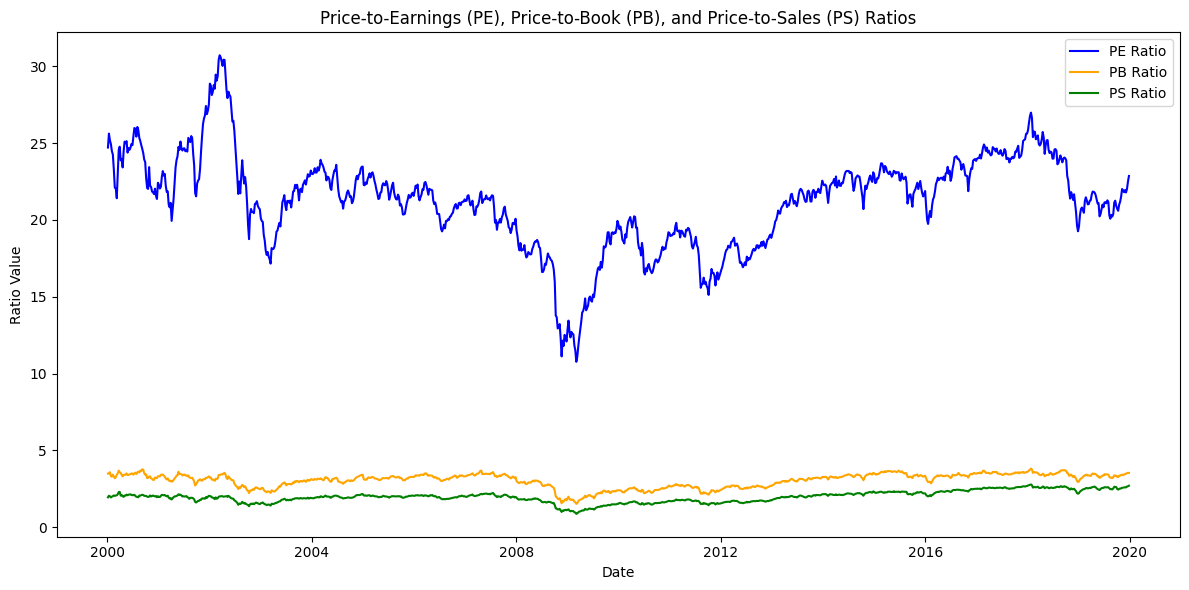

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is the DataFrame with your data
# data = pd.read_csv('your_data.csv')
data['date'] = pd.to_datetime(data['date'])

fig, ax = plt.subplots(figsize=(12, 6))

# Price-to-Earnings (PE) Ratio
ax.plot(data['date'], data['PeRatio'], label='PE Ratio', color='blue')

# Price-to-Book (PB) Ratio
ax.plot(data['date'], data['PbRatio'], label='PB Ratio', color='orange')

# Price-to-Sales (PS) Ratio
ax.plot(data['date'], data['PsRatio'], label='PS Ratio', color='green')

ax.set_title('Price-to-Earnings (PE), Price-to-Book (PB), and Price-to-Sales (PS) Ratios')
ax.set_xlabel('Date')
ax.set_ylabel('Ratio Value')
ax.legend()

plt.tight_layout()
plt.show()


In [ ]:
print(data.columns)

Index(['Unnamed: 0', 'date', 'adj close', 'return_t', 'return_t_plus_1', 'adx',
       'trix', 'adxr', 'cci', 'macdh', 'rsi_14', 'kdjk', 'wr_14',
       'atr_percent', 'atr', 'cmf', 'PbRatio', 'PeRatio', 'PsRatio',
       'spsentiment', 'sentiment', 'moving_average', 'MA10', 'MA50', 'MA200',
       'MA20', 'std20', 'Upper', 'Lower', '10_day_ma', '50_day_ma'],
      dtype='object')


In [ ]:
data['date']

0      2000-01-07
1      2000-01-14
2      2000-01-21
3      2000-01-28
4      2000-02-04
          ...    
1038   2019-11-29
1039   2019-12-06
1040   2019-12-13
1041   2019-12-20
1042   2019-12-27
Name: date, Length: 1043, dtype: datetime64[ns]